<a href="https://colab.research.google.com/github/wu2ming/Song-Classification/blob/main/song_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from models import CrnnModel
from train import main_train, validate_test, record_matrix
from Paras import Para
from data_loader import torch_dataset_loader
import torch
import torch.nn as nn

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
Para.learning_rate = 1e-5
Para.batch_size = 20
Para.epoch_num = 60
train_loader = torch_dataset_loader(Para.A_TRAIN_DATA_PATH, Para.batch_size, True, Para.kwargs)
validation_loader = torch_dataset_loader(Para.A_VAL_DATA_PATH, Para.batch_size, False, Para.kwargs)
test_loader = torch_dataset_loader(Para.A_TEST_DATA_PATH, Para.batch_size, False, Para.kwargs)

In [3]:
CRNN = CrnnModel()
loss_function = nn.BCELoss()

In [16]:
res = main_train(model=CRNN,
                 train_loader=train_loader,
                 valid_loader=validation_loader,
                  log_name='CrnnModel.json',
                 save_name='CrnnModel.pt',
                 loss_function=loss_function,
                 lr=Para.learning_rate,
                 epoch_num=Para.epoch_num)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch  1 | 123/495 batches | 21.65ms/ batch | BCE: 0.3179 | Accuracy: 18.17% |
Epoch  1 | 246/495 batches | 20.54ms/ batch | BCE: 0.3125 | Accuracy: 21.52% |
Epoch  1 | 369/495 batches | 20.05ms/ batch | BCE: 0.3084 | Accuracy: 23.52% |
Epoch  1 | 492/495 batches | 19.82ms/ batch | BCE: 0.3038 | Accuracy: 25.43% |
---------------------------------------------------------------------------------------------------
End of training epoch   1 | time:  9.84s | BCE: 0.3037 | Accuracy: 25.44% |
End of validation epoch   1 | time:  0.45s | BCE: 0.2749 | Accuracy: 35.81% |
---------------------------------------------------------------------------------------------------
***Found Best Training Model***
***Best Validation Model Found and Saved***
---------------------------------------------------------------------------------------------------
Epoch  2 | 123/495 batches | 19.65ms/ batch | BCE: 0.2850 | Accuracy: 32.32% |
Epoch  2 | 246/495 batches | 19.42ms/ batch | BCE: 0.2822 | Accuracy: 33.76

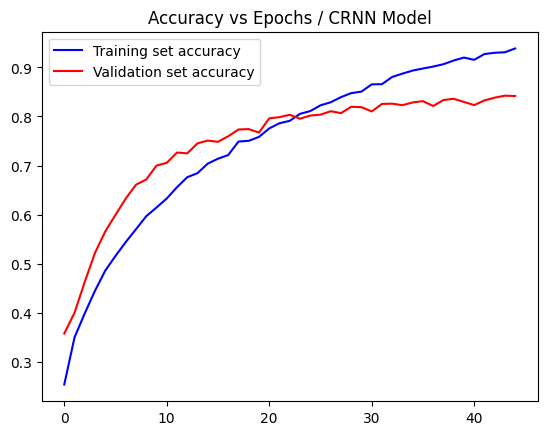

In [18]:
plt.figure()
plt.plot(res['train_accu'], c='b', label='Training set accuracy')
plt.plot(res['valid_accu'], c='r', label='Validation set accuracy')
plt.title('Accuracy vs Epochs / CRNN Model')
plt.legend()
plt.show()

Test Data

In [20]:
torch.save(CRNN.state_dict(), Para.MODEL_SAVE_FOlD)

In [22]:
#CRNN.cuda().load_state_dict(torch.load(Para.MODEL_SAVE_FOlD + 'CRnnModel.pt'))
validate_test(model=CRNN, epoch=0, use_loader=test_loader, loss_function=loss_function)

End of validation epoch   0 | time:  0.44s | BCE: 0.0940 | Accuracy: 82.63% |
---------------------------------------------------------------------------------------------------


(0.09401563564766079, 0.8263282732447815)

Data Visuallization


In [11]:
import json
import numpy as np
import pandas as pd
import seaborn as sn
CRNN.cuda().load_state_dict(torch.load(Para.MODEL_SAVE_FOlD + 'CrnnModel.pt'))
record_matrix(model=CRNN, use_loader=test_loader, log_name='CrnnMatrix.json')

End of Matrix Record, Save file in ../logsCrnnMatrix.json
---------------------------------------------------------------------------------------------------


In [12]:
with open(Para.LOG_SAVE_FOLD + 'CrnnMatrix.json', 'r') as f:
    crnn_l = json.load(f)
cnn_m, crnn_m, lcrnn_m = np.zeros((10, 10)), np.zeros((10, 10)), np.zeros((10, 10))

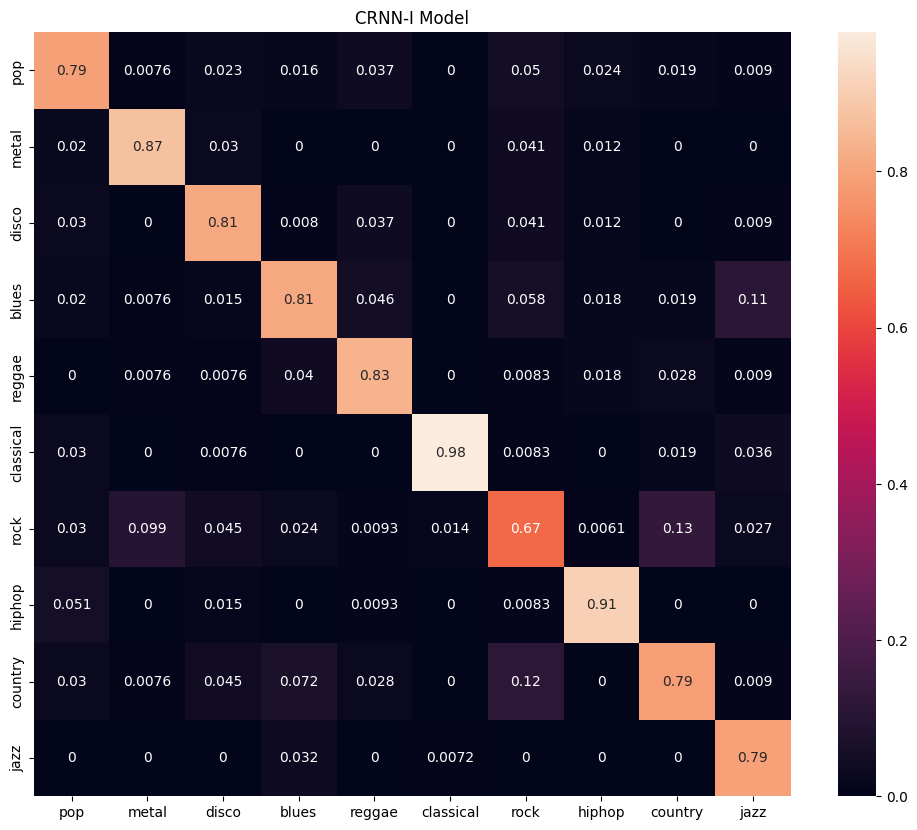

In [13]:

for point in crnn_l:
    i, j = point
    crnn_m[i][j] += 1

crnn_m/=sum(crnn_m)
crnn_m = pd.DataFrame(crnn_m, index = [Para.dictionary.get(i) for i in range(10)],
                  columns = [Para.dictionary.get(i) for i in range(10)],)
plt.figure(figsize=(10, 24))
plt.subplot(3, 1, 2)
plt.title('CRNN-I Model')
sn.heatmap(crnn_m, annot=True,)
plt.tight_layout()
plt.savefig('matrix.png')